# Diabetes Risk Prediction and Stage Classification
by AMALAN KANNAN Théo, CHENENE Iliès, CLERE HAMELIN Maxime

Link to the dataset : https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset/data

## Project Objectives

The goal of this project is twofold:

1. **Predict the diabetes risk score** (`diabetes_risk_score`) for a patient using lifestyle, demographic and medical variables.
2. **Identify and quantify the most influential features** involved in the computation of this risk score.
3. **Classify the diabetes stage** (`diabetes_stage`) while dealing with strong class imbalance.

This work combines:
- Linear modeling and statistical inference
- Assumption verification
- Feature significance testing
- Machine Learning classification
- Imbalanced learning strategies
- Model comparison & optimization

---

## Dataset Overview

The dataset contains demographic, behavioral and clinical information for ~100,000 patients.

Target variables (dropped during regression and classification):
- `diabetes_risk_score`
- `diabetes_stage`
- `diagnosed_diabetes`

The dataset includes:
- Numerical features (BMI, glucose, cholesterol...)
- Lifestyle features (sleep, screen, activity, alcohol...)
- Medical history (family history, hypertension...)
- Categorical socio-demographic variables

All categorical features will be one-hot encoded, and there is no missing value.


## Dataset description :

| **Feature**                         | **Type**       | **Description**                           | **Values/Range**                                          |
|-------------------------------------|----------------|--------------------------------------------|-----------------------------------------------------------|
| patient_id                          | Integer        | Unique patient identifier                  | 1–100000                                                  |
| age                                 | Integer        | Age of patient in years                    | 18–90                                                     |
| gender                              | String         | Patient gender                             | 'Male', 'Female', 'Other'                                |
| ethnicity                           | String         | Ethnic background                          | 'White', 'Hispanic', 'Black', 'Asian', 'Other'           |
| education_level                     | String         | Highest completed education                | 'No formal', 'Highschool', 'Graduate', 'Postgraduate'    |
| income_level                        | String         | Income category                            | 'Low', 'Medium', 'High'                                  |
| employment_status                   | String         | Employment type                            | 'Employed', 'Unemployed', 'Retired', 'Student'           |
| smoking_status                      | String         | Smoking behavior                           | 'Never', 'Former', 'Current'                             |
| alcohol_consumption_per_week        | Float          | Drinks consumed per week                   | 0–30                                                      |
| physical_activity_minutes_per_week  | Integer        | Weekly physical activity (minutes)         | 0–600                                                     |
| diet_score                          | Integer        | Diet quality score                         | 0–10                                                      |
| sleep_hours_per_day                 | Float          | Average daily sleep hours                  | 3–12                                                      |
| screen_time_hours_per_day           | Float          | Average daily screen screen                | 0–12                                                      |
| family_history_diabetes             | Integer        | Family history of diabetes                 | 0 = No, 1 = Yes                                           |
| hypertension_history                | Integer        | Hypertension history                       | 0 = No, 1 = Yes                                           |
| cardiovascular_history              | Integer        | Cardiovascular history                     | 0 = No, 1 = Yes                                           |
| bmi                                 | Float          | Body Mass Index (kg/m²)                    | 15–45                                                     |
| waist_to_hip_ratio                  | Float          | Waist-to-hip ratio                         | 0.7–1.2                                                   |
| systolic_bp                         | Integer        | Systolic blood pressure (mmHg)             | 90–180                                                    |
| diastolic_bp                        | Integer        | Diastolic blood pressure (mmHg)            | 60–120                                                    |
| heart_rate                          | Integer        | Resting heart rate (bpm)                   | 50–120                                                    |
| cholesterol_total                   | Float          | Total cholesterol (mg/dL)                  | 120–300                                                   |
| hdl_cholesterol                     | Float          | HDL cholesterol (mg/dL)                    | 20–100                                                    |
| ldl_cholesterol                     | Float          | LDL cholesterol (mg/dL)                    | 50–200                                                    |
| triglycerides                       | Float          | Triglycerides (mg/dL)                      | 50–500                                                    |
| glucose_fasting                     | Float          | Fasting glucose (mg/dL)                    | 70–250                                                    |
| glucose_postprandial                | Float          | Post-meal glucose (mg/dL)                  | 90–350                                                    |
| insulin_level                       | Float          | Blood insulin level (µU/mL)                | 2–50                                                      |
| hba1c                               | Float          | HbA1c (%)                                  | 4–14                                                      |
| diabetes_risk_score                 | Integer        | Risk score (0–100)                         | 0–100                                                     |
| diabetes_stage                      | String         | Stage of diabetes                          | 'No Diabetes', 'Pre-Diabetes', 'Type 1', 'Type 2', 'Gestational' |
| diagnosed_diabetes                  | Integer        | Diabetes diagnosis (target)                | 0 = No, 1 = Yes                                           |


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, r2_score
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTENC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
import kagglehub

warnings.filterwarnings('ignore')

In [2]:
path=kagglehub.dataset_download("mohankrishnathalla/diabetes-health-indicators-dataset")
data = pd.read_csv(f"{path}/diabetes_dataset.csv")

Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.


In [3]:
data.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [4]:
data.describe(include="all")

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
count,100000.00000,100000,100000,100000,100000,100000,100000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000
unique,NaN,3,5,4,5,4,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,Female,White,Highschool,Middle,Employed,Never,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Type 2,NaN
freq,NaN,50216,44997,44891,35152,60175,59813,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59774,NaN
mean,50.12041,NaN,NaN,NaN,NaN,NaN,NaN,2.003670,118.911640,5.994787,...,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,NaN,0.599980
std,15.60460,NaN,NaN,NaN,NaN,NaN,NaN,1.417779,84.409662,1.780954,...,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,NaN,0.489904
min,18.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,NaN,0.000000
25%,39.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,57.000000,4.800000,...,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,NaN,0.000000
50%,50.00000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,100.000000,6.000000,...,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,NaN,1.000000
75%,61.00000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,160.000000,7.200000,...,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,NaN,1.000000


We drop every "target-like" features so predictions are not biased

In [5]:
targets = ["diabetes_risk_score", "diabetes_stage", "diagnosed_diabetes"]
X = data.drop(columns=targets, axis=1)
y = data["diabetes_risk_score"]

Encoding : We encode categorical variables by get_dummies

In [6]:
X = pd.get_dummies(data=X, drop_first=True)
X_bool = X.select_dtypes(include=["bool"]).columns.tolist()
X[X_bool] = X[X_bool].astype("int64")

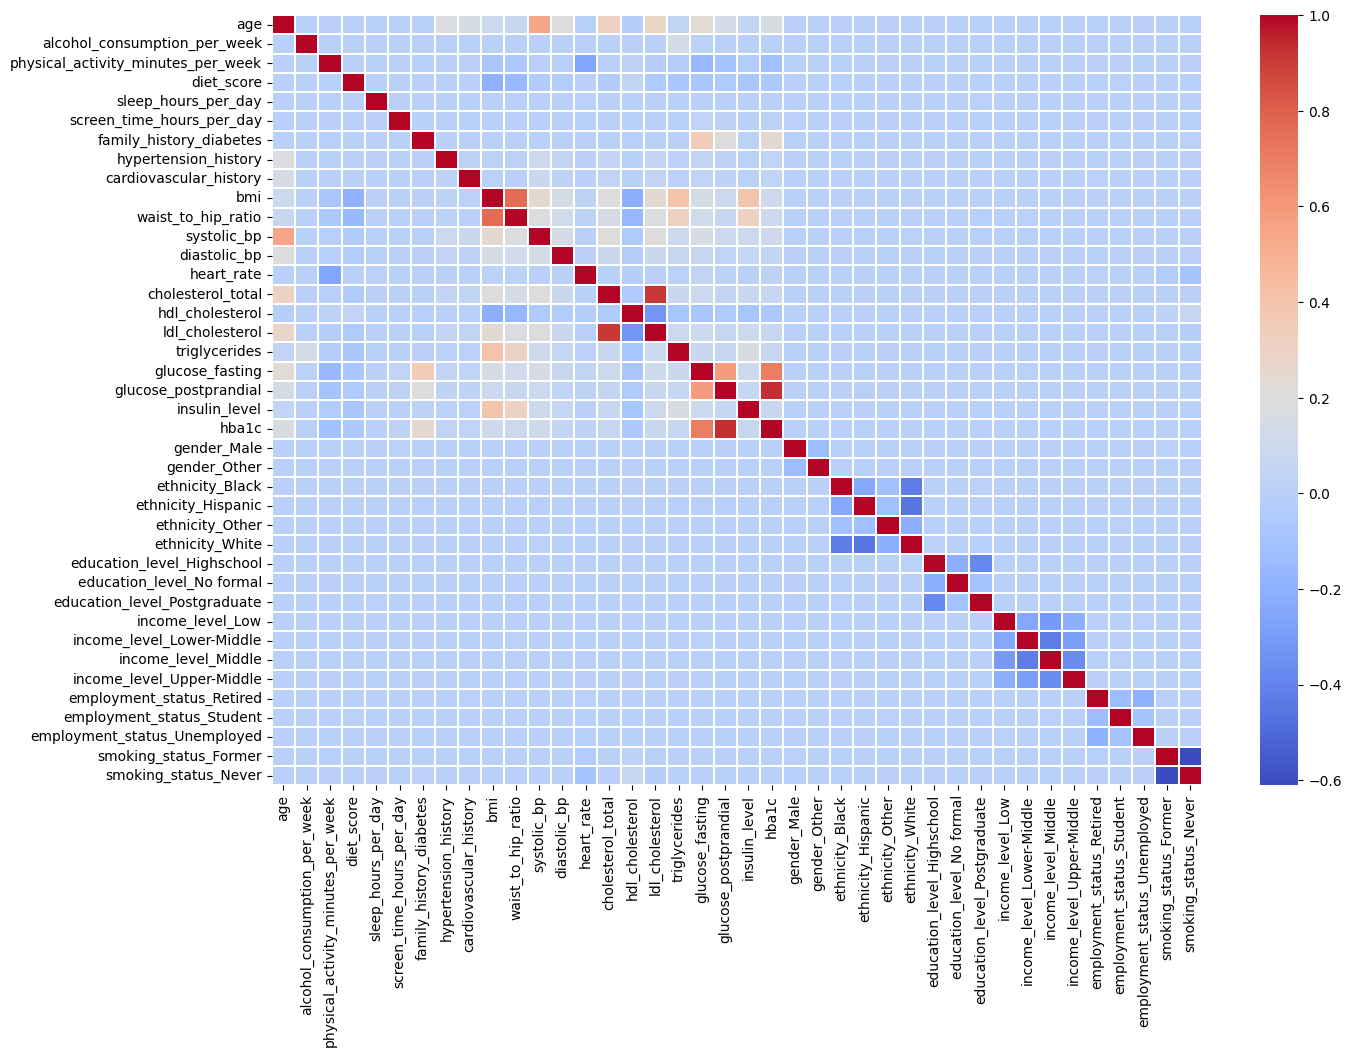

In [7]:
corr_matrix = X.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.1)
plt.show()

We had intercept into the dataframe by hand to do further analysis later

In [8]:
X["intercept"] = 1

In [9]:
lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
lr = LinearRegression(fit_intercept=False)
lr.fit(lr_X_train, lr_y_train)

lr_y_pred = lr.predict(lr_X_test)

r2 = r2_score(lr_y_test, lr_y_pred)
print(f"r2-score :{r2}")

r2-score :0.9932831185187903


A linear regression was performed to predict the diabetes_risk_score.  
A very high R²-score was obtained, suggesting that the risk score is likely computed linearly from a subset of the available features.

Now the objective is to determine which features are the most important for the diabetes_risk_score by calculating the p-values. \
Before interpreting the coefficients, the main hypotheses of the linear model need to be investigated :

We assume that linearity and independance of the residuals are verified (indepence is since a line is a patient independant from another)

Normality of residuals : $e_i = y_i - \hat{y}_i$

In [11]:
lr_y_pred_train = lr.predict(lr_X_train)
residuals = lr_y_train - lr_y_pred_train

We check the means of residuals

In [12]:
np.mean(residuals)

np.float64(2.6786750595420016e-14)

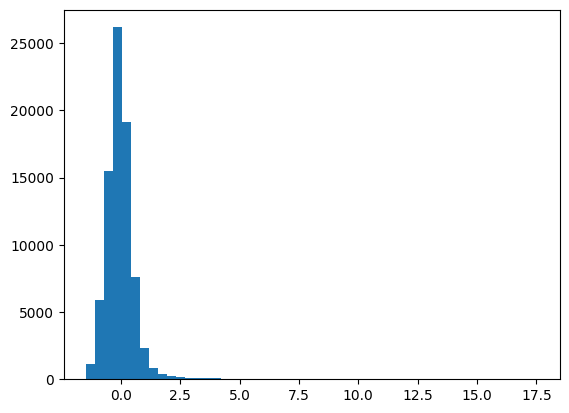

In [13]:
plt.hist(residuals, bins=50)
plt.show()

The residuals do not appear normal because there is a strong asymmetry to the right, but we do a Lilliefors test to verify :

We test : $H_0 : e_i \sim \mathcal{N}(\mu,\sigma^2)$ vs $H_1 : e_i \not\sim \mathcal{N}(\mu,\sigma^2)$

In [14]:
stat, p = stats.shapiro(residuals)
print(f"p-value : {p}, residuals can be considered as normal" if p>0.05 else f"p-value : {p}, residuals can't be considered as normal")

p-value : 2.0451499756757098e-138, residuals can't be considered as normal


There is no normality for the residuals

Now, we want to see if there is homoscedasticity

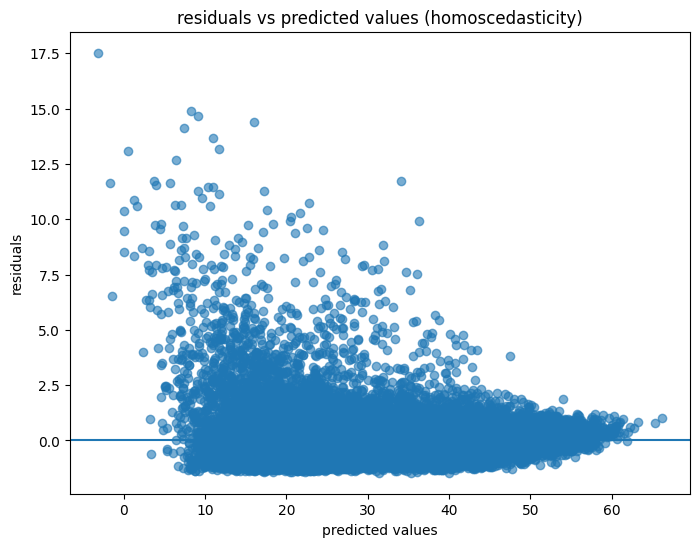

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(lr_y_pred_train, residuals, alpha=0.6)
plt.axhline(0)
plt.xlabel("predicted values")
plt.ylabel("residuals")
plt.title("residuals vs predicted values (homoscedasticity)")
plt.show()

There is no homoscedasticity

We check the full rank of X :

In [16]:
np.linalg.matrix_rank(X) == X.shape[1]

np.True_

X is invertible

| Assumption | Status |
|----------|-------|
| Linearity | Yes |
| Independence of observations | Yes |
| Zero mean of residuals | Yes |
| Homoscedasticity | No |
| Normality of residuals | No |
| Full rank of X | Yes |

We can now calculate the p-values and IC knowing these hypothesis :

We test $H_0 : \beta_j = 0$ vs $H_1 : \beta_j \neq 0$

$z_j = \frac{\hat{\beta}_j}{\sqrt{[(X^TX)^{-1}X^T\sum X(X^TX)^{-1}]_{jj}}} \simeq \mathcal{N}(0,\,1)$, with $\sum = diag(\sigma_1^2, ..., \sigma_n^2)$, the rejection region is $R = \{|z_j| > q_{1-\alpha/2}\}$ and the p-values are : $p_j = 2(1-\phi(|z_j^{obs}|))$

In [17]:
beta_hat = lr.coef_
sigma2_hat = residuals**2
X_weighted = lr_X_train * (residuals.values**2)[:, None]
XtX_inv = np.linalg.inv(lr_X_train.T @ lr_X_train)
se_beta = np.sqrt(np.diag(XtX_inv @ (lr_X_train.T @ X_weighted) @ XtX_inv))

z_values = beta_hat / se_beta
p_values = 2 * (1 - stats.norm.cdf(np.abs(z_values)))

df_pvalues = pd.DataFrame([p_values], columns=X.columns)
df_pvalues

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,employment_status_Retired,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never,intercept
0,0.0,0.97037,0.0,0.0,0.512263,0.0,0.0,0.82084,0.8869,0.0,...,0.955233,0.503659,0.951366,0.809465,0.943391,0.389302,0.327303,0.010563,0.041594,0.0


Effect of having one hour more screen time per day on diabetes_risk_score (99% CI) :

In [18]:
q = stats.norm.ppf(0.995)
borne_inf = beta_hat[5] - q*se_beta[5]
borne_sup = beta_hat[5] + q*se_beta[5]
print(f"[{borne_inf:.3f}, {borne_sup:.3f}]")

[0.275, 0.281]


So we got the intervals of confidence for each variables :

In [19]:
bornes_inf = beta_hat - q*se_beta
bornes_sup = beta_hat + q*se_beta
df_bornes = pd.DataFrame([bornes_inf, bornes_sup], index=["b_inf", "b_sup"], columns=X.columns).drop(columns="intercept")
df_bornes

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,education_level_Postgraduate,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,employment_status_Retired,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never
b_inf,0.276604,-0.004781,-0.035538,-0.507154,-0.004426,0.275356,15.970315,-0.013965,-0.025705,0.444911,...,-0.029025,-0.033454,-0.024096,-0.032079,-0.036178,-0.017136,-0.018469,-0.012703,-0.041050,-0.030877
b_sup,0.277719,0.004646,-0.034940,-0.499295,0.007446,0.280704,16.005435,0.016657,0.023015,0.451107,...,0.011144,0.034944,0.040996,0.030595,0.029985,0.016216,0.037012,0.028294,0.000152,0.003603


Since the intervals with 0 in it are not interesting, we make another df with only the representatives one

In [20]:
cond = (df_bornes < 0).any() & (df_bornes > 0).any()
df_bornes_rep = df_bornes.drop(columns=df_bornes.columns[cond])
df_bornes_rep_sorted = df_bornes_rep.loc[:, abs(df_bornes_rep.iloc[0]).sort_values(ascending=False).index]
df_bornes_rep_sorted

,family_history_diabetes,diet_score,bmi,age,screen_time_hours_per_day,hdl_cholesterol,physical_activity_minutes_per_week,triglycerides,cholesterol_total,glucose_fasting,ldl_cholesterol
b_inf,15.970315,-0.507154,0.444911,0.276604,0.275356,-0.095411,-0.035538,0.012725,-0.001996,0.001871,0.000895
b_sup,16.005435,-0.499295,0.451107,0.277719,0.280704,-0.093377,-0.034940,0.013070,-0.000720,0.003397,0.002164


So we can extract most important features based on the p-values we calculate earlier

In [21]:
imp_features = df_pvalues.columns[df_pvalues.loc[0] == 0].tolist()
imp_features

['age',
 'physical_activity_minutes_per_week',
 'diet_score',
 'screen_time_hours_per_day',
 'family_history_diabetes',
 'bmi',
 'hdl_cholesterol',
 'triglycerides',
 'glucose_fasting',
 'intercept']

#### New linear regression with these features

In [22]:
lr_X_train_2, lr_X_test_2, lr_y_train_2, lr_y_test_2 = train_test_split(X[imp_features], y, test_size=0.2, random_state=42)

In [23]:
lr_2 = LinearRegression(fit_intercept=False)
lr_2.fit(lr_X_train_2, lr_y_train_2)

lr_y_pred_2 = lr_2.predict(lr_X_test_2)

r2_2 = r2_score(lr_y_test_2, lr_y_pred_2)
print(f"r2-score :{r2_2}")

r2-score :0.993281085421129


The R²-score remained almost unchanged, confirming that the risk score is mainly driven by a limited number of features.

## Diabetes Stage Classification

The second task is to classify the diabetes_stage.

However, the dataset is highly imbalanced, with the majority class being Type 2 diabetes. This causes :

- High global accuracy
- Very poor recall on minority classes (Type 1, Gestational...)

This is why we will use the macro F1-score and recall to evaluate our models, since it takes into consideration the imbalance.

Three approaches were tested to adress the imbalance :

1. SMOTENC oversampling (implicit synthetic data generation for categorical features)
2. Downsampling majority class
3. Combination of downsampling + SMOTENC

Random Forest models were used to evaluate all strategies.

We print all the values we have to predict, and count them to see the repartition

<Axes: xlabel='diabetes_stage'>

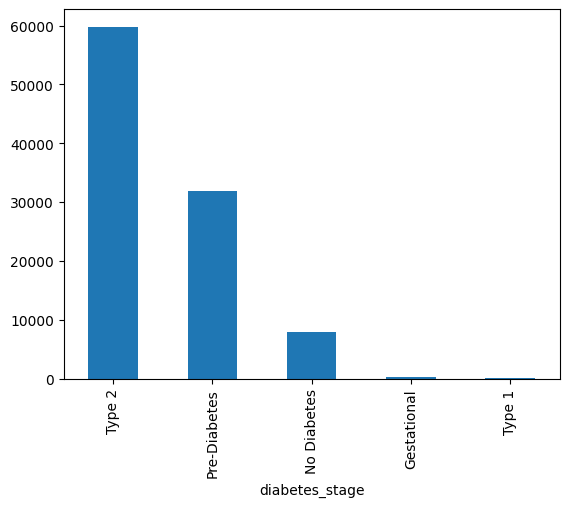

In [24]:
data["diabetes_stage"].value_counts().plot(kind="bar")

The dataset is highly unbalanced, there is nearly 60000 Type 2 for only nearly a 100 Type 1

In [25]:
X.drop(columns="intercept", inplace=True)
y_class = data["diabetes_stage"]
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

We quickly test on a Random Forest model to see what we suggested

In [26]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_class, y_train_class)

y_pred_class = rf.predict(X_test_class)

acc_class = accuracy_score(y_pred_class, y_test_class)
print(f"accuracy : {acc_class}")
print(classification_report(y_test_class, y_pred_class))

accuracy : 0.91645
              precision    recall  f1-score   support

 Gestational       0.00      0.00      0.00        57
 No Diabetes       0.86      1.00      0.92      1561
Pre-Diabetes       0.82      1.00      0.90      6479
      Type 1       0.00      0.00      0.00        24
      Type 2       1.00      0.87      0.93     11879

    accuracy                           0.92     20000
   macro avg       0.54      0.57      0.55     20000
weighted avg       0.93      0.92      0.92     20000



In [27]:
def disp_conf_matrix(model, X_test, y_test, titre="Matrice de Confusion"):
    disp = metrics.ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        cmap=plt.cm.Blues
    )
    disp.figure_.suptitle(titre)
    plt.show()

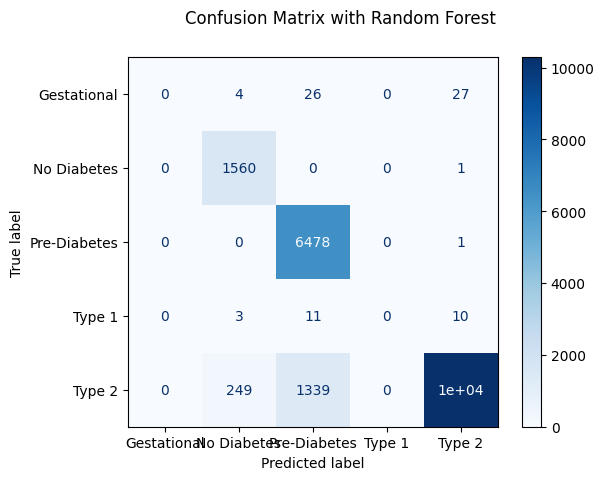

In [28]:
disp_conf_matrix(rf, X_test_class, y_test_class, titre="Confusion Matrix with Random Forest")

Indeed, there is a high accuracy du to the fact that there are a lot of Type 2 in the dataset, but there is no recall at all on the two less represented classes

We need to balance these different classes

We split by categories

In [29]:
continuous_cols = X.select_dtypes(include=['float64']).columns.tolist()
binary_cols = [col for col in X.columns if set(X[col].unique()) <= {0,1} and col != 'diabetes_stage']
integer_cols = [col for col in X.select_dtypes(include=['int64']).columns if col not in binary_cols and col != 'diabetes_stage']

### 1st method : SMOTENC (Synthetic Minority Over-sampling Technique for Nominal and Continuous) :

A first idea was to use SMOTE (Synthetic Minority Over-sampling Technique).It works by selecting a minority class instance and finding its nearest neighbors in the feature space. It then generates a new synthetic point on the line segment connecting them. However this linear interpolation fails with categorical features.

Therefore, since our dataset is made of continuous variables and categorical variables, we have to use SMOTENC, an extension of SMOTE designed to adress this issue by specifying the categorical features in its arguments.

Besides, oversampling is applied only to the training set after the train-test split to prevent data leakage. Indeed, the synthetic samples should not be used to evaluate the model.

In [30]:
sm = SMOTENC(random_state=42, categorical_features=[X.columns.get_loc(col) for col in binary_cols])

X_smotenc, y_smotenc = sm.fit_resample(X_train_class, y_train_class)

<Axes: xlabel='diabetes_stage'>

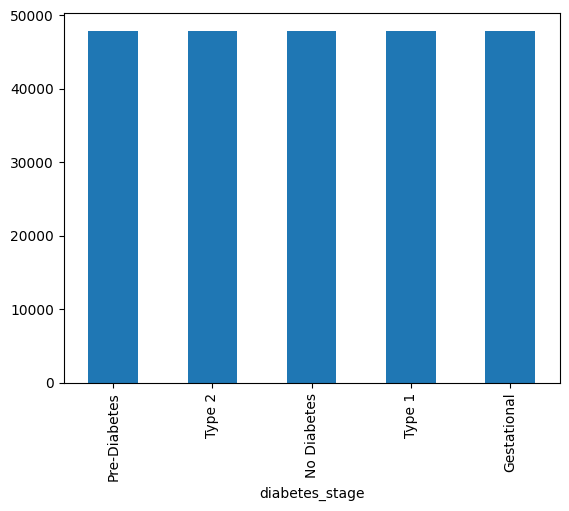

In [31]:
y_smotenc.value_counts().plot(kind="bar")

Evaluating if it's better or not with Random Forest

In [32]:
smotenc_rf = RandomForestClassifier(n_estimators=100)
smotenc_rf.fit(X_smotenc, y_smotenc)

y_pred_class = smotenc_rf.predict(X_test_class)

acc_class = accuracy_score(y_pred_class, y_test_class)
print(f"accuracy : {acc_class}")
print(classification_report(y_test_class, y_pred_class))

accuracy : 0.9123
              precision    recall  f1-score   support

 Gestational       0.00      0.00      0.00        57
 No Diabetes       0.86      0.98      0.92      1561
Pre-Diabetes       0.82      1.00      0.90      6479
      Type 1       0.00      0.00      0.00        24
      Type 2       1.00      0.86      0.92     11879

    accuracy                           0.91     20000
   macro avg       0.53      0.57      0.55     20000
weighted avg       0.92      0.91      0.91     20000



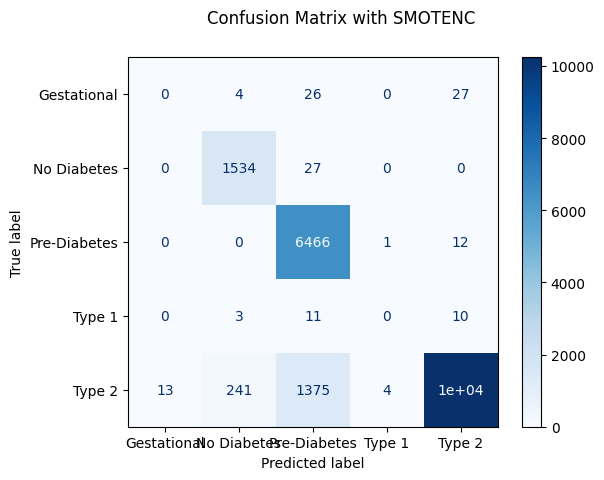

In [33]:
disp_conf_matrix(smotenc_rf, X_test_class, y_test_class, titre="Confusion Matrix with SMOTENC")

This does not seem to be really better, the imbalance is too important

### 2nd method : Downsampling majority classes :

In [34]:
max_class_size = 150

X_list = []
y_list = []

for col in y_train_class.unique():
    idx = y_train_class[y_train_class == col].index

    if len(idx) >= max_class_size:
        idx_sampled = np.random.choice(
            idx,
            size=max_class_size,
            replace=False
        )
        X_list.append(X_train_class.loc[idx_sampled])
        y_list.append(y_train_class.loc[idx_sampled])

    else :
        X_list.append(X_train_class.loc[idx])
        y_list.append(y_train_class.loc[idx])

X_reduced = pd.concat(X_list, axis=0).reset_index(drop=True)
y_reduced = pd.concat(y_list, axis=0).reset_index(drop=True)


<Axes: xlabel='diabetes_stage'>

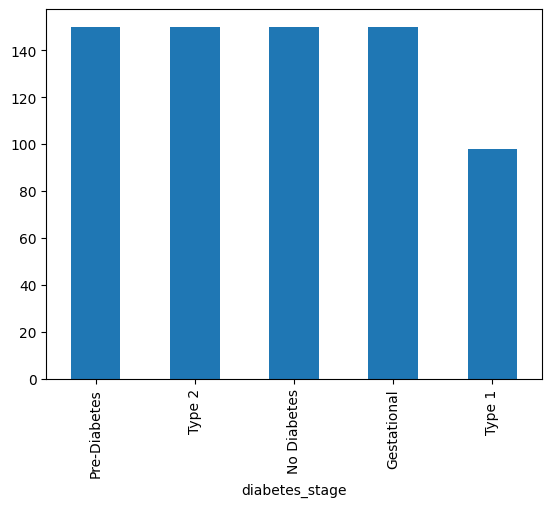

In [35]:
y_reduced.value_counts().plot(kind="bar")

In [36]:
reduced_rf = RandomForestClassifier(n_estimators=100, random_state=42)
reduced_rf.fit(X_reduced, y_reduced)

y_pred_class_reduced = reduced_rf.predict(X_test_class)

acc = accuracy_score(y_test_class, y_pred_class_reduced)
print(f"Accuracy : {acc}")
print(classification_report(y_test_class, y_pred_class_reduced))

Accuracy : 0.73305
              precision    recall  f1-score   support

 Gestational       0.01      0.75      0.03        57
 No Diabetes       0.81      0.99      0.89      1561
Pre-Diabetes       0.80      0.75      0.77      6479
      Type 1       0.01      0.21      0.01        24
      Type 2       0.99      0.69      0.82     11879

    accuracy                           0.73     20000
   macro avg       0.52      0.68      0.50     20000
weighted avg       0.91      0.73      0.80     20000



This is a bit better since we have more recall than before on Gestational and Type 1

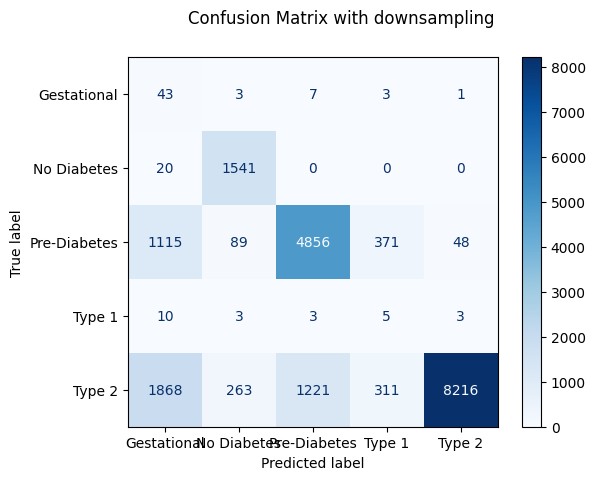

In [37]:
disp_conf_matrix(reduced_rf, X_test_class, y_test_class, titre="Confusion Matrix with downsampling")

### 3rd method : Combining the 2 we already did

In [38]:
sm_2 = SMOTENC(random_state=42, categorical_features=[X.columns.get_loc(col) for col in binary_cols])

X_smrec, y_smrec = sm_2.fit_resample(X_reduced, y_reduced)

<Axes: xlabel='diabetes_stage'>

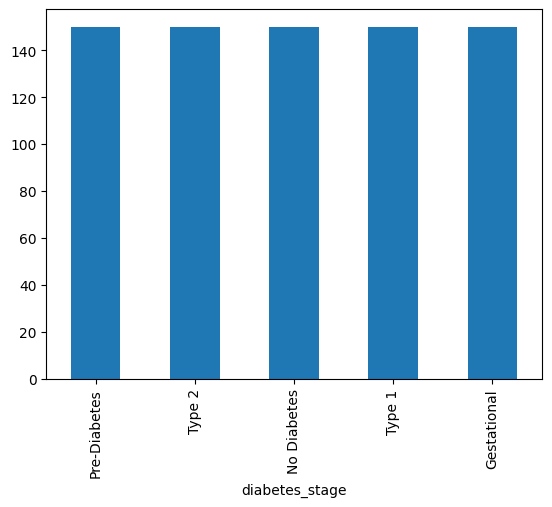

In [39]:
y_smrec.value_counts().plot(kind="bar")

In [40]:
smrec_rf = RandomForestClassifier(n_estimators=100, class_weight="balanced")
smrec_rf.fit(X_smrec, y_smrec)

y_pred_class = smrec_rf.predict(X_test_class)

acc_class = accuracy_score(y_pred_class, y_test_class)
print(f"accuracy : {acc_class}")
print(classification_report(y_test_class, y_pred_class))

accuracy : 0.7185
              precision    recall  f1-score   support

 Gestational       0.01      0.56      0.03        57
 No Diabetes       0.81      0.99      0.89      1561
Pre-Diabetes       0.80      0.71      0.75      6479
      Type 1       0.01      0.33      0.01        24
      Type 2       0.99      0.69      0.81     11879

    accuracy                           0.72     20000
   macro avg       0.52      0.66      0.50     20000
weighted avg       0.91      0.72      0.80     20000



This is the best we managed to do with the dataset, the imbalance is too strong. \
We'll stay with this modified train sample for the future.

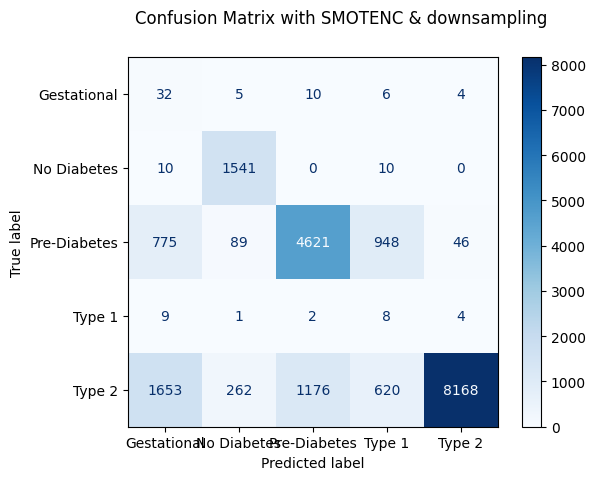

In [41]:
disp_conf_matrix(smrec_rf, X_test_class, y_test_class, titre="Confusion Matrix with SMOTENC & downsampling")

We now try to compare different model and parameters by using GridSearch and Crossvalidation. \
We also try to use PCA to see if it gives a better generalisation.

In [42]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(class_weight="balanced")
}

results = {}

for name, model in models.items():

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_smrec, y_smrec)
    preds = pipe.predict(X_test_class)

    print(f"\n{name}")
    print(classification_report(y_test_class, preds))

    results[name] = pipe


Logistic Regression
              precision    recall  f1-score   support

 Gestational       0.01      0.67      0.02        57
 No Diabetes       0.57      0.75      0.65      1561
Pre-Diabetes       0.64      0.44      0.52      6479
      Type 1       0.00      0.29      0.01        24
      Type 2       0.88      0.63      0.74     11879

    accuracy                           0.58     20000
   macro avg       0.42      0.56      0.39     20000
weighted avg       0.78      0.58      0.66     20000


Random Forest
              precision    recall  f1-score   support

 Gestational       0.02      0.72      0.03        57
 No Diabetes       0.82      0.98      0.90      1561
Pre-Diabetes       0.79      0.69      0.74      6479
      Type 1       0.00      0.29      0.01        24
      Type 2       0.99      0.68      0.81     11879

    accuracy                           0.71     20000
   macro avg       0.53      0.67      0.50     20000
weighted avg       0.91      0.71      0.

Tree-based models (Random Forest, Gradient Boosting) outperform linear and SVM models in this imbalanced multiclass setting.

We do some hyperparameters tuning on the Random Forest model : \
We use GridSearchCV and evaluate on the f1-macro score because it's the more representative for this problem of imbalance.

In [43]:
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10]
}

pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(pipe_rf, param_grid, cv=cv, scoring="f1_macro", n_jobs=-1)
grid.fit(X_smrec, y_smrec)

print("Best parameters:", grid.best_params_)
print("Best cross validated F1-macro:", grid.best_score_)

best_model = grid.best_estimator_
best_preds = best_model.predict(X_test_class)

print("\n Optimized Random Forest")
print(classification_report(y_test_class, best_preds))

Best parameters: {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best cross validated F1-macro: 0.7277475550588248

 Optimized Random Forest
              precision    recall  f1-score   support

 Gestational       0.02      0.74      0.03        57
 No Diabetes       0.83      0.99      0.90      1561
Pre-Diabetes       0.79      0.69      0.74      6479
      Type 1       0.00      0.29      0.01        24
      Type 2       0.99      0.68      0.80     11879

    accuracy                           0.71     20000
   macro avg       0.53      0.68      0.50     20000
weighted avg       0.91      0.71      0.79     20000



Hyperparameter tuning improves performance marginally, mainly affecting minority class recall.

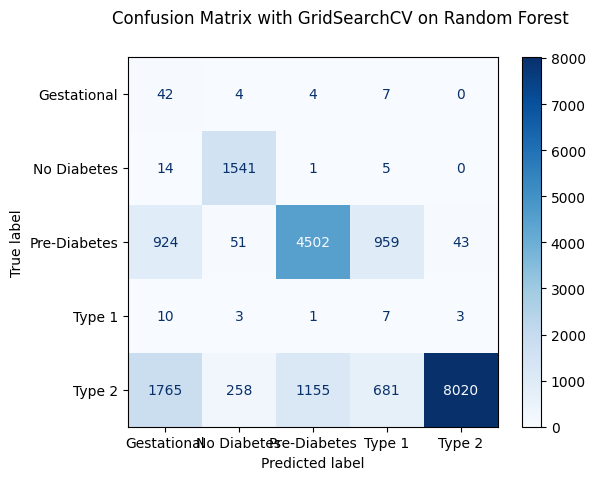

In [44]:
disp_conf_matrix(best_model, X_test_class, y_test_class, titre="Confusion Matrix with GridSearchCV on Random Forest")

In [45]:
pipe_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('model', RandomForestClassifier(class_weight='balanced'))
])

pipe_pca.fit(X_smrec, y_smrec)
preds_pca = pipe_pca.predict(X_test_class)

print("RandomForest + PCA")
print(classification_report(y_test_class, preds_pca))

RandomForest + PCA
              precision    recall  f1-score   support

 Gestational       0.01      0.39      0.01        57
 No Diabetes       0.50      0.78      0.61      1561
Pre-Diabetes       0.59      0.45      0.51      6479
      Type 1       0.00      0.29      0.01        24
      Type 2       0.89      0.59      0.71     11879

    accuracy                           0.56     20000
   macro avg       0.40      0.50      0.37     20000
weighted avg       0.76      0.56      0.64     20000



PCA reduces performance, highlighting the importance of original feature information for this problem.

Future improvements could include :
- Mainly more sophisticated oversampling or augmentation techniques for minority classes.
- More adapted models for the imbalance problem.
- calibration of predicted probabilities.

## Conclusion :

1. **Linear regression** :
- Linear regression achieved a high R², suggesting the diabetes risk score is largely determined by a subset of features.
- p-values and confidence intervals highlighted the most significant variables for risk score calculation.
- This analysis provides actionable insights for healthcare professionals focusing on modifiable risk factors.

2. **Classification** :
- Multi-class diabetes stage prediction highlighted challenges due to class imbalance.
- Also highlighted the importance of the evaluation metrics.
- The model is excellent for mass screening (No vs Type 2), but requires more clinical data to finely distinguish rare subtypes.

3. **Examples of real-world applications** :
- Provide good insights for healthcare professionals focusing on risk factors.
- With a better model, can provide good insights for the diabetes stage of a patient.